In [31]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#reading house data

house_data = pd.read_csv('./data/data.csv')
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [33]:
print(house_data['yr_built'].unique())
print(len(house_data['yr_built'].unique()))
print(house_data['yr_renovated'].unique())
print(len(house_data['yr_renovated'].unique()))
print(house_data['street'].unique())
print(len(house_data['street'].unique()))
print((house_data['city'].unique()))
print(len(house_data['city'].unique()))
print(house_data['statezip'].unique())
print(len(house_data['statezip'].unique()))


[1955 1921 1966 1963 1976 1938 1989 1985 1945 1948 1909 1980 1939 1965
 1956 1997 1987 1983 1923 1954 2005 1991 1959 1920 1979 1951 1967 2004
 2014 1995 1944 1992 1957 1978 1974 1950 1990 1949 1968 1977 1996 2001
 2000 1929 2006 2008 2009 2012 2013 2007 1986 1973 1988 1900 1928 1982
 1960 2003 1998 1942 1908 1958 1971 1975 1961 1924 1902 1962 1953 1999
 1994 1930 1984 2010 1912 1947 1916 1940 1970 1952 1964 1926 1905 1969
 1903 1943 1993 1946 1910 1904 1981 1906 1922 2011 2002 1917 1913 1914
 1937 1925 1932 1918 1972 1941 1919 1936 1911 1927 1931 1901 1907 1915
 1935 1933 1934]
115
[2005    0 1992 1994 2010 1988 2009 1969 2000 1979 1989 2014 1999 2003
 1983 1997 1912 1923 1954 2011 2001 2013 2006 1972 1985 1998 2004 1958
 2008 1970 1982 1986 1996 2002 1971 1990 1956 1945 1984 2012 1993 2007
 1981 1974 1963 1968 1995 1934 1953 1966 1955 1987 1960 1978 1980 1948
 1991 1913 1977 1975]
60
['18810 Densmore Ave N' '709 W Blaine St' '26206-26214 143rd Ave SE' ...
 '759 Ilwaco Pl NE' '5148 S C

In [34]:
house_data.shape


(4600, 18)

In [35]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [36]:
#dropping street column due to high cardinality
house_data.drop(['street','date','country'],axis = 1, inplace =True)

In [37]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


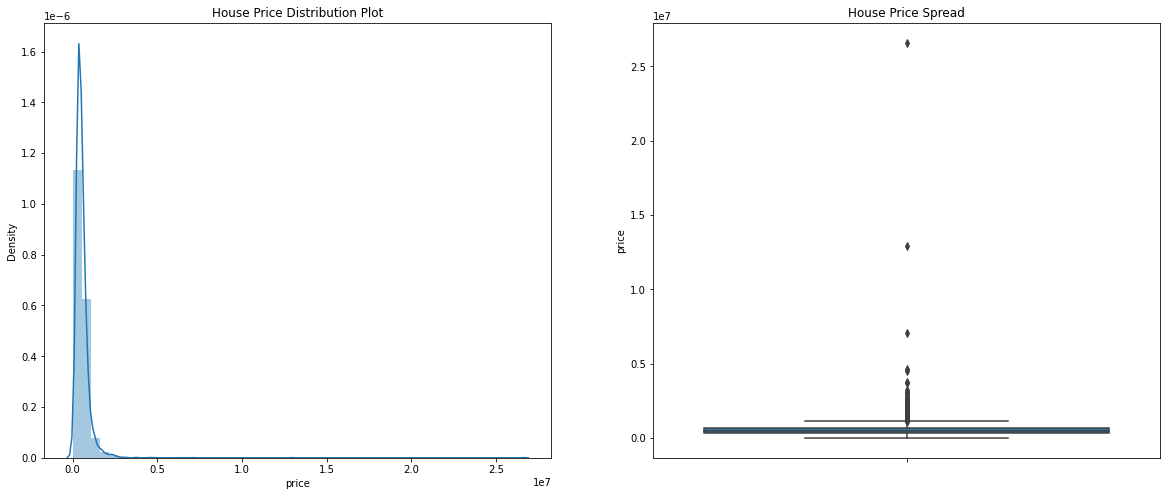

In [38]:
#visualising house price

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(house_data['price'])

plt.subplot(1,2,2)
plt.title('House Price Spread')
sns.boxplot(y=house_data['price'])

plt.show()

In [39]:
#encoding categorical data



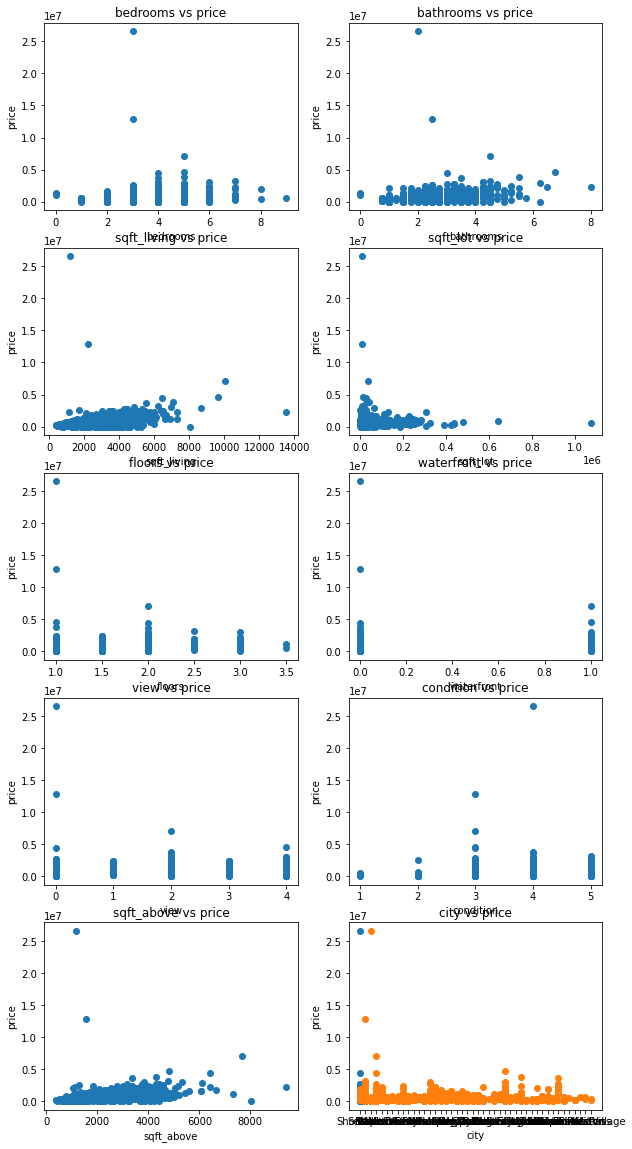

In [40]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(house_data[x],house_data['price'])
    plt.title(x+' vs price')
    plt.ylabel('price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('bedrooms', 1)
scatter('bathrooms', 2)
scatter('sqft_living', 3)
scatter('sqft_lot', 4)
scatter('floors', 5)
scatter('waterfront', 6)
scatter('view', 7)
scatter('condition', 8)
scatter('sqft_above', 9)
scatter('sqft_basement', 10)
scatter('city', 10)


plt.show()

In [41]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.patches as ptch
features = list(house_data.columns[1:])
output = house_data['price'].values.reshape(-1, 1)
mir_result = {}
for col in features:    
    if house_data[col].dtype != np.float64 and house_data[col].dtype != np.int64:
        feature_factorized, _ = house_data[col].factorize() 
        m = mutual_info_regression(output, feature_factorized, random_state=0)
    else:
        m = mutual_info_regression(output, house_data[col], random_state=0)
    mir_result[col] = m

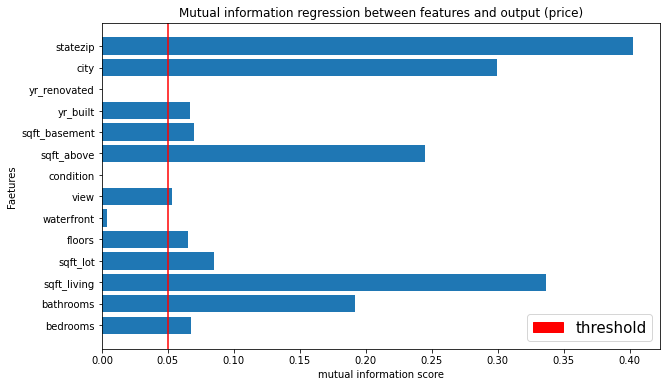

In [42]:
x = list(mir_result.keys())
y = [score[0] for score in list(mir_result.values())]
plt.figure(figsize=(10,6))
plt.barh(x, y)
plt.title("Mutual information regression between features and output (price)")
plt.xlabel("mutual information score")
plt.ylabel("Faetures")
red_patch= ptch.Patch(color="red", label="threshold")
plt.legend(handles=[red_patch], loc=4, prop={'size': 15})
plt.axvline(x=0.05, color="red")
plt.show()

In [43]:
# Remove features with threshold < 0.05

threshold = 0.05
new_columns = []
for col,mir in mir_result.items():
    if mir > threshold:
        new_columns.append(col)
new_columns.append('price')
house_data = house_data[new_columns]

In [44]:
house_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,city,statezip,price
0,3.0,1.50,1340,7912,1.5,0,1340,0,1955,Shoreline,WA 98133,313000.0
1,5.0,2.50,3650,9050,2.0,4,3370,280,1921,Seattle,WA 98119,2384000.0
2,3.0,2.00,1930,11947,1.0,0,1930,0,1966,Kent,WA 98042,342000.0
3,3.0,2.25,2000,8030,1.0,0,1000,1000,1963,Bellevue,WA 98008,420000.0
4,4.0,2.50,1940,10500,1.0,0,1140,800,1976,Redmond,WA 98052,550000.0


In [45]:
#Outlier Detection with z score
from scipy import stats

columns = list(house_data.columns)
rows_to_drop = []
for col in columns:
    if house_data[col].dtype != np.float64 and house_data[col].dtype != np.int64:
        continue
    z_scores = stats.zscore(house_data[col])
    for i in range(len(z_scores)):
        if abs(z_scores[i]) > 3:
            rows_to_drop.append(i)

rows_to_drop = sorted(list(set(rows_to_drop)))
house_data = house_data.drop(rows_to_drop)
house_data.reset_index(drop=True, inplace=True)


house_data.shape

(4247, 12)

In [46]:
house_data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,city,statezip,price
0,3.0,1.50,1340,7912,1.5,0,1340,0,1955,Shoreline,WA 98133,313000.0
1,3.0,2.00,1930,11947,1.0,0,1930,0,1966,Kent,WA 98042,342000.0
2,3.0,2.25,2000,8030,1.0,0,1000,1000,1963,Bellevue,WA 98008,420000.0
3,4.0,2.50,1940,10500,1.0,0,1140,800,1976,Redmond,WA 98052,550000.0
4,2.0,1.00,880,6380,1.0,0,880,0,1938,Seattle,WA 98115,490000.0


In [47]:
#defining dummy map function

def dummies(x):
    temp_df = pd.get_dummies(house_data[x])
    #dropping the categorical feature
    house_data.drop([x],axis=1,inplace=True)
    return (pd.concat([temp_df,house_data],axis=1))


#getting dummy variables

house_data = dummies('city')
house_data = dummies('statezip')

house_data.head()

,WA 98001,WA 98002,WA 98003,WA 98004,WA 98005,WA 98006,WA 98007,WA 98008,WA 98010,WA 98011,...,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,price
0,0,0,0,0,0,0,0,0,0,0,...,3.0,1.50,1340,7912,1.5,0,1340,0,1955,313000.0
1,0,0,0,0,0,0,0,0,0,0,...,3.0,2.00,1930,11947,1.0,0,1930,0,1966,342000.0
2,0,0,0,0,0,0,0,1,0,0,...,3.0,2.25,2000,8030,1.0,0,1000,1000,1963,420000.0
3,0,0,0,0,0,0,0,0,0,0,...,4.0,2.50,1940,10500,1.0,0,1140,800,1976,550000.0
4,0,0,0,0,0,0,0,0,0,0,...,2.0,1.00,880,6380,1.0,0,880,0,1938,490000.0


In [48]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(house_data, train_size = 0.8, test_size = 0.2,random_state = 100)


In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','sqft_above','sqft_basement','yr_built','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_train.head()

,WA 98001,WA 98002,WA 98003,WA 98004,WA 98005,WA 98006,WA 98007,WA 98008,WA 98010,WA 98011,...,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,price
1963,0,0,0,0,0,0,0,0,0,0,...,0.2,0.066667,0.167756,0.037176,0.00,0.0,0.190594,0.000000,0.368421,0.189573
1312,0,0,0,0,0,0,0,0,0,0,...,0.4,0.733333,0.509804,0.023637,0.50,0.0,0.316832,0.623529,0.921053,0.297156
414,0,0,0,0,0,0,0,0,0,0,...,0.6,0.466667,0.342048,0.026212,0.50,0.0,0.388614,0.000000,0.903509,0.156398
3695,0,0,0,0,0,0,0,0,0,0,...,0.6,0.466667,0.417429,0.063579,0.50,0.0,0.474257,0.000000,0.894737,0.227962
2172,0,1,0,0,0,0,0,0,0,0,...,0.4,0.333333,0.276688,0.038676,0.25,0.0,0.314356,0.000000,0.087719,0.110900


In [50]:
df_test.head()

,WA 98001,WA 98002,WA 98003,WA 98004,WA 98005,WA 98006,WA 98007,WA 98008,WA 98010,WA 98011,...,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,price
2341,0,0,0,0,0,0,0,0,0,0,...,0.6,0.466667,0.540476,0.073033,0.5,0.0,0.573232,0.0,0.789474,0.296604
2470,0,0,0,0,0,0,0,0,0,0,...,0.6,0.533333,0.540476,0.301828,0.5,0.0,0.573232,0.0,0.666667,0.304105
3819,0,0,0,0,0,0,0,0,0,0,...,0.6,0.533333,0.447619,0.028547,1.0,0.0,0.474747,0.0,0.692982,0.404564
519,0,0,0,0,0,0,0,0,0,0,...,0.8,0.466667,0.612143,0.043283,0.5,0.0,0.649242,0.0,0.929825,0.169553
2397,1,0,0,0,0,0,0,0,0,0,...,0.4,0.200000,0.188095,0.057146,0.0,0.0,0.199495,0.0,0.640351,0.079549


In [51]:
# Seperating X and y variables

y_train = df_train.pop('price')
X_train = df_train
y_test = df_test.pop('price')
X_test = df_test

In [52]:
X_train

,WA 98001,WA 98002,WA 98003,WA 98004,WA 98005,WA 98006,WA 98007,WA 98008,WA 98010,WA 98011,...,Yarrow Point,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built
1963,0,0,0,0,0,0,0,0,0,0,...,0,0.2,0.066667,0.167756,0.037176,0.00,0.0,0.190594,0.000000,0.368421
1312,0,0,0,0,0,0,0,0,0,0,...,0,0.4,0.733333,0.509804,0.023637,0.50,0.0,0.316832,0.623529,0.921053
414,0,0,0,0,0,0,0,0,0,0,...,0,0.6,0.466667,0.342048,0.026212,0.50,0.0,0.388614,0.000000,0.903509
3695,0,0,0,0,0,0,0,0,0,0,...,0,0.6,0.466667,0.417429,0.063579,0.50,0.0,0.474257,0.000000,0.894737
2172,0,1,0,0,0,0,0,0,0,0,...,0,0.4,0.333333,0.276688,0.038676,0.25,0.0,0.314356,0.000000,0.087719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,0,0,0,0,0,0,0,0,0,0,...,0,0.6,0.666667,0.464052,0.043017,0.25,0.0,0.393564,0.317647,0.228070
1890,0,0,0,0,0,0,0,0,0,0,...,0,0.4,0.466667,0.361656,0.018055,0.50,0.0,0.334158,0.182353,0.885965
350,0,0,0,0,0,0,0,0,0,0,...,0,0.4,0.466667,0.300654,0.022629,0.50,0.0,0.341584,0.000000,0.798246
79,0,0,0,0,0,0,0,0,0,0,...,0,0.6,0.600000,0.723312,0.077102,0.50,0.0,0.821782,0.000000,0.859649


# MODEL BUILDING

In [53]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
mlr = LinearRegression()
from sklearn.metrics import r2_score
def build_model(X_train_rfe,X_test_rfe):
    X = sm.add_constant(X_train_rfe) #Adding the constant
    lm = sm.OLS(y_train,X).fit() # fitting the model
    X_test_rfe = sm.add_constant(X_test_rfe)
    y_pred= lm.predict(X_test_rfe)
    r2 = r2_score(y_test,y_pred)
    return [lm,r2]
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [79]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=130)
rfe = rfe.fit(X_train, y_train)
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]
print(X_train_rfe.shape)
print(X_test_rfe.shape)
[lm,r2] = build_model(X_train_rfe,X_test_rfe)
print(lm.summary())
print("R2 score ",r2)

(3397, 130)
(850, 130)
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     96.76
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:01:15   Log-Likelihood:                 4581.2
No. Observations:                3397   AIC:                            -8958.
Df Residuals:                    3295   BIC:                            -8333.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const      

In [61]:
const                   0.0899      0.006     14.658      0.000       0.078       0.102
WA 98001               -0.0500      0.015     -3.308      0.001      -0.080      -0.020
WA 98002               -0.0483      0.019     -2.542      0.011      -0.086      -0.011
WA 98003                0.0023      0.025      0.089      0.929      -0.048       0.052
WA 98004                0.1882      0.011     17.876      0.000       0.168       0.209
WA 98005                0.0417      0.015      2.791      0.005       0.012       0.071
WA 98006                0.0110      0.012      0.926      0.354      -0.012       0.034
WA 98007                0.0060      0.014      0.436      0.663      -0.021       0.033
WA 98008               -0.0266      0.014     -1.960      0.050      -0.053    9.59e-06
WA 98010               -0.0274      0.011     -2.435      0.015      -0.049      -0.005
WA 98011               -0.0114      0.033     -0.341      0.733      -0.077       0.054
WA 98014               -0.0319      0.010     -3.296      0.001      -0.051      -0.013
WA 98019               -0.0230      0.006     -3.908      0.000      -0.035      -0.011
WA 98022               -0.0401      0.008     -5.245      0.000      -0.055      -0.025
WA 98023               -0.0073      0.025     -0.296      0.767      -0.056       0.041
WA 98024               -0.0096      0.016     -0.607      0.544      -0.041       0.021
WA 98027                0.0648      0.031      2.062      0.039       0.003       0.126
WA 98028               -0.0058      0.032     -0.181      0.857      -0.069       0.057
WA 98029                0.0920      0.032      2.915      0.004       0.030       0.154
WA 98030               -0.0269      0.010     -2.632      0.009      -0.047      -0.007
WA 98031               -0.0170      0.009     -1.828      0.068      -0.035       0.001
WA 98032               -0.0315      0.014     -2.253      0.024      -0.059      -0.004
WA 98033                0.0618      0.006     10.798      0.000       0.051       0.073
WA 98034               -0.0247      0.006     -4.233      0.000      -0.036      -0.013
WA 98038               -0.0352      0.004     -8.576      0.000      -0.043      -0.027
WA 98039                0.1212      0.018      6.651      0.000       0.085       0.157
WA 98040                0.0708      0.005     14.700      0.000       0.061       0.080
WA 98042               -0.0304      0.008     -4.028      0.000      -0.045      -0.016
WA 98045               -0.0189      0.005     -3.553      0.000      -0.029      -0.008
WA 98047               -0.0369      0.013     -2.853      0.004      -0.062      -0.012
WA 98050                0.0083      0.031      0.263      0.793      -0.053       0.070
WA 98051               -0.0172      0.018     -0.944      0.345      -0.053       0.019
WA 98052               -0.0144      0.045     -0.322      0.748      -0.102       0.073
WA 98053               -0.0371      0.045     -0.829      0.407      -0.125       0.051
WA 98055               -0.0045      0.013     -0.356      0.722      -0.030       0.020
WA 98056                0.0099      0.008      1.231      0.219      -0.006       0.026
WA 98057               -0.0301      0.019     -1.612      0.107      -0.067       0.007
WA 98058               -0.0126      0.008     -1.589      0.112      -0.028       0.003
WA 98059                0.0095      0.007      1.292      0.196      -0.005       0.024
WA 98065               -0.0155      0.005     -3.084      0.002      -0.025      -0.006
WA 98068                0.0175      0.031      0.558      0.577      -0.044       0.079
WA 98070               -0.0129      0.009     -1.434      0.152      -0.031       0.005
WA 98072                0.0057      0.007      0.786      0.432      -0.009       0.020
WA 98074               -0.0429      0.025     -1.749      0.080      -0.091       0.005
WA 98075               -0.0074      0.025     -0.300      0.764      -0.056       0.041
WA 98077               -0.0066      0.008     -0.830      0.407      -0.022       0.009
WA 98092               -0.0579      0.018     -3.286      0.001      -0.092      -0.023
WA 98102                0.1003      0.016      6.340      0.000       0.069       0.131
WA 98103                0.0523      0.008      6.926      0.000       0.038       0.067
WA 98105                0.1348      0.011     11.915      0.000       0.113       0.157
WA 98106               -0.0554      0.010     -5.811      0.000      -0.074      -0.037
WA 98107                0.0490      0.010      4.747      0.000       0.029       0.069
WA 98108               -0.0566      0.011     -4.989      0.000      -0.079      -0.034
WA 98109                0.1579      0.014     11.150      0.000       0.130       0.186
WA 98112                0.1788      0.010     18.081      0.000       0.159       0.198
WA 98115                0.0409      0.008      5.185      0.000       0.025       0.056
WA 98116                0.0384      0.010      3.725      0.000       0.018       0.059
WA 98117                0.0383      0.008      4.839      0.000       0.023       0.054
WA 98118               -0.0311      0.009     -3.452      0.001      -0.049      -0.013
WA 98119                0.1021      0.012      8.304      0.000       0.078       0.126
WA 98122                0.0478      0.010      4.750      0.000       0.028       0.068
WA 98125               -0.0293      0.009     -3.333      0.001      -0.046      -0.012
WA 98126               -0.0145      0.009     -1.571      0.116      -0.033       0.004
WA 98133               -0.0213      0.010     -2.092      0.037      -0.041      -0.001
WA 98136                0.0066      0.010      0.644      0.519      -0.013       0.027
WA 98144                0.0245      0.009      2.607      0.009       0.006       0.043
WA 98146               -0.0671      0.011     -6.269      0.000      -0.088      -0.046
WA 98148               -0.0730      0.024     -3.068      0.002      -0.120      -0.026
WA 98155               -0.0156      0.015     -1.038      0.299      -0.045       0.014
WA 98166               -0.0539      0.019     -2.785      0.005      -0.092      -0.016
WA 98168               -0.0752      0.011     -6.575      0.000      -0.098      -0.053
WA 98177                0.0076      0.013      0.611      0.541      -0.017       0.032
WA 98178               -0.1128      0.011    -10.095      0.000      -0.135      -0.091
WA 98188               -0.1284      0.024     -5.428      0.000      -0.175      -0.082
WA 98198               -0.1127      0.030     -3.731      0.000      -0.172      -0.053
WA 98199                0.0539      0.010      5.358      0.000       0.034       0.074
WA 98288               -0.0318      0.018     -1.747      0.081      -0.068       0.004
WA 98354               -0.0133      0.022     -0.596      0.551      -0.057       0.030
Algona                 -0.0499      0.031     -1.606      0.108      -0.111       0.011
Auburn                 -0.0319      0.016     -2.007      0.045      -0.063      -0.001
Beaux Arts Village     -0.0113      0.057     -0.199      0.842      -0.122       0.100
Bellevue                0.0520      0.011      4.618      0.000       0.030       0.074
Black Diamond          -0.0274      0.011     -2.435      0.015      -0.049      -0.005
Bothell                -0.0069      0.032     -0.215      0.830      -0.070       0.056
Burien                  0.0130      0.015      0.867      0.386      -0.016       0.042
Carnation              -0.0319      0.010     -3.296      0.001      -0.051      -0.013
Clyde Hill             -0.1002      0.027     -3.658      0.000      -0.154      -0.046
Covington              -0.0532      0.012     -4.270      0.000      -0.078      -0.029
Des Moines              0.0347      0.029      1.199      0.231      -0.022       0.091
Duvall                 -0.0230      0.006     -3.908      0.000      -0.035      -0.011
Enumclaw               -0.0401      0.008     -5.245      0.000      -0.055      -0.025
Fall City              -0.0096      0.016     -0.607      0.544      -0.041       0.021
Federal Way            -0.0794      0.024     -3.297      0.001      -0.127      -0.032
Inglewood-Finn Hill -1.663e-17      3e-18     -5.552      0.000   -2.25e-17   -1.08e-17
Issaquah               -0.0551      0.031     -1.788      0.074      -0.115       0.005
Kenmore                -0.0102      0.033     -0.313      0.755      -0.075       0.054
Kent                   -0.0526      0.006     -9.205      0.000      -0.064      -0.041
Kirkland                0.0371      0.004      8.620      0.000       0.029       0.045
Lake Forest Park       -0.0276      0.020     -1.410      0.159      -0.066       0.011
Maple Valley           -0.0352      0.004     -8.576      0.000      -0.043      -0.027
Medina                  0.1212      0.018      6.651      0.000       0.085       0.157
Mercer Island           0.0708      0.005     14.700      0.000       0.061       0.080
Milton                 -0.0133      0.022     -0.596      0.551      -0.057       0.030
Newcastle               0.0235      0.012      1.970      0.049       0.000       0.047
Normandy Park           0.0348      0.025      1.414      0.158      -0.013       0.083
North Bend             -0.0189      0.005     -3.553      0.000      -0.029      -0.008
Pacific                -0.0369      0.013     -2.853      0.004      -0.062      -0.012
Preston                 0.0083      0.031      0.263      0.793      -0.053       0.070
Ravensdale             -0.0172      0.018     -0.944      0.345      -0.053       0.019
Redmond                 0.0665      0.044      1.499      0.134      -0.020       0.153
Renton                 -0.0513      0.006     -9.263      0.000      -0.062      -0.040
Sammamish               0.0437      0.024      1.785      0.074      -0.004       0.092
SeaTac                  0.0380      0.021      1.838      0.066      -0.003       0.079
Seattle                 0.0339      0.007      4.932      0.000       0.020       0.047
Shoreline               0.0005      0.013      0.042      0.966      -0.024       0.025
Skykomish              -0.0318      0.018     -1.747      0.081      -0.068       0.004
Snoqualmie             -0.0155      0.005     -3.084      0.002      -0.025      -0.006
Snoqualmie Pass         0.0175      0.031      0.558      0.577      -0.044       0.079
Tukwila                 0.0592      0.016      3.653      0.000       0.027       0.091
Vashon                 -0.0129      0.009     -1.434      0.152      -0.031       0.005
Woodinville            -0.0009      0.005     -0.170      0.865      -0.012       0.010
Yarrow Point            0.2798      0.034      8.210      0.000       0.213       0.347
bedrooms               -0.0299      0.009     -3.500      0.000      -0.047      -0.013
bathrooms               0.0430      0.011      4.037      0.000       0.022       0.064
sqft_living             0.1947      0.006     35.122      0.000       0.184       0.206
sqft_lot                0.0342      0.012      2.779      0.005       0.010       0.058
floors                 -0.0269      0.007     -4.069      0.000      -0.040      -0.014
view                    0.0429      0.006      7.669      0.000       0.032       0.054
sqft_above              0.2120      0.006     34.528      0.000       0.200       0.224
sqft_basement           0.0218      0.006      3.850      0.000       0.011       0.033
yr_built               -0.0200      0.007     -3.062      0.002      -0.033      -0.007

NameError: name 'lm' is not defined